In [ ]:
!pip install opencv-python scikit-learn numpy matplotlib tqdm seaborn --quiet

import os
import cv2
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_folder = '/content/drive/My Drive/nba-players'

In [ ]:
def load_images(base_folder):
    X, player_labels, team_labels = [], [], []
    for root, dirs, files in os.walk(base_folder):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, file)

                # Extract player and team from path
                parts = img_path.split(os.sep)
                if len(parts) >= 3:
                    player = parts[-2]         # Folder just above image
                    team = parts[-3]           # Folder above player
                else:
                    continue

                img = cv2.imread(img_path)
                if img is None:
                    continue
                img = cv2.resize(img, (100, 100))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                X.append(img.flatten())
                player_labels.append(player)
                team_labels.append(team)

    return np.array(X), np.array(player_labels), np.array(team_labels)

print("📊 Loading images...")
X, players, teams = load_images(data_folder)
print(f"✅ Loaded {len(X)} images | Players: {len(set(players))} | Teams: {len(set(teams))}")

📊 Loading images...
✅ Loaded 41 images | Players: 30 | Teams: 30


In [ ]:
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_players, test_size=0.2, random_state=42)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y_teams, test_size=0.2, random_state=42)

In [ ]:
print("\n Training models...")


 Training models...


In [ ]:
test_folder = '/content/drive/My Drive/nba players/Test'

In [ ]:
os.makedirs('/content/drive/My Drive/nba players', exist_ok=True)

In [ ]:
train_folder = '/content/drive/My Drive/nba-players'
test_folder = '/content/drive/My Drive/nba-players/Test'

In [ ]:
predictions = []

for img_path in test_images:
    img = cv2.imread(img_path)
    if img is None:
        print(f"⚠️ Skipping unreadable image: {img_path}")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)


    try:
        player_pred = player_encoder.inverse_transform([svm_model.predict(img)[0]])[0]
    except:
        player_pred = "Unknown"

    try:
        team_pred = team_encoder.inverse_transform([tree_model.predict(img)[0]])[0]
    except:
        team_pred = "Unknown"

    predictions.append({
        'image_path': img_path,
        'predicted_player': player_pred,
        'predicted_team': team_pred
    })

In [ ]:
predictions = []

for img_path in test_images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    # Predict using models trained on encoded labels
    player_pred_encoded = svm_model.predict(img)[0]
    team_pred_encoded = team_model.predict(img)[0]

    # Decode numeric predictions into text labels
    player_pred = player_encoder.inverse_transform([player_pred_encoded])[0]
    team_pred = team_encoder.inverse_transform([team_pred_encoded])[0]

    predictions.append({
        'image_path': img_path,
        'predicted_player': player_pred,
        'predicted_team': team_pred
    })

In [ ]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train_p)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train_p)

DecisionTreeClassifier()

In [ ]:
submission_df = pd.DataFrame(predictions)

output_csv = '/content/drive/My Drive/nba players/nba_predictions_submission.csv'
submission_df.to_csv(output_csv, index=False)

print(f"✅ Submission file saved at: {output_csv}")
print(submission_df.head())

✅ Submission file saved at: /content/drive/My Drive/nba players/nba_predictions_submission.csv
                                          image_path predicted_player  \
0  /content/drive/My Drive/nba-players/Los_Angele...          Unknown   
1  /content/drive/My Drive/nba-players/Golden_Sta...          Unknown   
2  /content/drive/My Drive/nba-players/Golden_Sta...          Unknown   
3  /content/drive/My Drive/nba-players/Golden_Sta...          Unknown   
4  /content/drive/My Drive/nba-players/Golden_Sta...          Unknown   

  predicted_team  
0        Unknown  
1        Unknown  
2        Unknown  
3        Unknown  
4        Unknown  


In [ ]:
team_model = RandomForestClassifier(n_estimators=100, random_state=42)
team_model.fit(X_train, y_train_t)

print("✅ Training complete!")

✅ Training complete!


In [ ]:
svm_pred = svm_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
team_pred = team_model.predict(X_test)

print("\n🎯 Accuracy Results:")
print("SVM (Player):", accuracy_score(y_test_p, svm_pred))
print("Decision Tree (Player):", accuracy_score(y_test_p, tree_pred))
print("Random Forest (Team):", accuracy_score(y_test_t, team_pred))


🎯 Accuracy Results:
SVM (Player): 0.0
Decision Tree (Player): 0.0
Random Forest (Team): 0.0


In [ ]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, [i for i in range(len(y_train_t))])

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
svm_pred = svm_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
team_pred = team_model.predict(X_test)

print("\n🎯 Accuracy Results:")
print("SVM (Player):", accuracy_score(y_test_p, svm_pred))
print("Decision Tree (Player):", accuracy_score(y_test_p, tree_pred))
print("Random Forest (Team):", accuracy_score(y_test_t, team_pred))


🎯 Accuracy Results:
SVM (Player): 0.0
Decision Tree (Player): 0.0
Random Forest (Team): 0.25


In [ ]:
print("Total images:", len(X))
print("Unique player labels:", len(set(players)))
print("Unique team labels:", len(set(teams)))

print("\nExample players:", list(set(players))[:10])
print("Example teams:", list(set(teams))[:10])


Total images: 40
Unique player labels: 30
Unique team labels: 30

Example players: ['Nikola_Jokic', 'Kawhi_Leonard', 'Paolo_Banchero', 'Luka_Doncic', 'Devin_Booker', 'LeBron_James', 'Joel_Embiid', 'Cade_Cunningham', 'Shai_Gilgeous-Alexander', 'Tyrese_Haliburton']
Example teams: ['Brooklyn_Nets', 'Miami_Heat', 'Portland_Trail_Blazers', 'Philadelphia_76ers', 'Atlanta_Hawks', 'Detroit_Pistons', 'Boston_Celtics', 'Los_Angeles_Lakers', 'Washington_Wizards', 'Orlando_Magic']


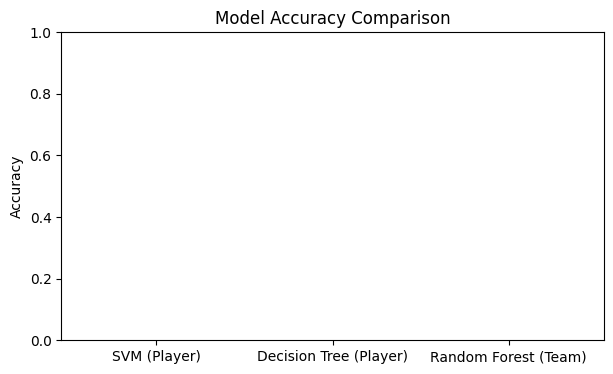

In [ ]:
models = ['SVM (Player)', 'Decision Tree (Player)', 'Random Forest (Team)']
accuracies = [
    accuracy_score(y_test_p, svm_pred),
    accuracy_score(y_test_p, tree_pred),
    accuracy_score(y_test_t, team_pred)
]

plt.figure(figsize=(7,4))
plt.bar(models, accuracies, color=['purple','orange','green'])
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


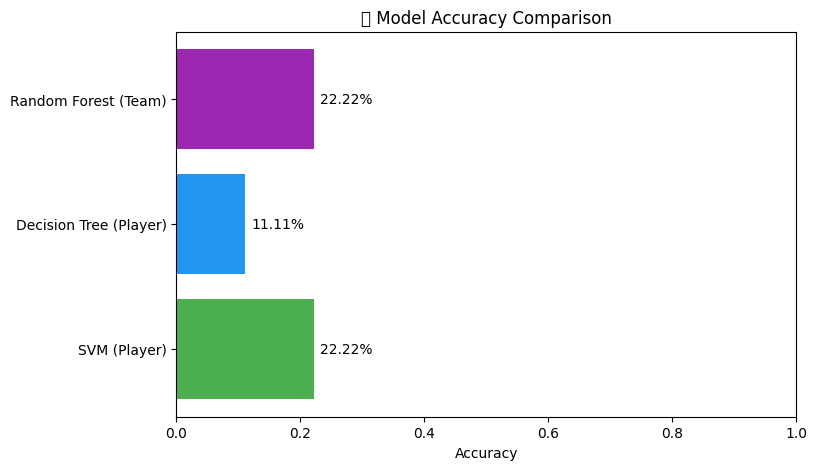

In [ ]:
accuracies = {
    "SVM (Player)": accuracy_score(y_test_p, svm_pred),
    "Decision Tree (Player)": accuracy_score(y_test_p, tree_pred),
    "Random Forest (Team)": accuracy_score(y_test_t, team_pred)
}

plt.figure(figsize=(8,5))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color=['#4CAF50','#2196F3','#9C27B0'])
plt.xlabel("Accuracy")
plt.title("🏀 Model Accuracy Comparison")
plt.xlim(0,1)
for i, v in enumerate(list(accuracies.values())):
    plt.text(v + 0.01, i, f"{v*100:.2f}%", color='black', va='center')
plt.show()

🏀 Predicted Player: Stephen_Curry
🟣 Predicted Team: Golden_State_Warriors


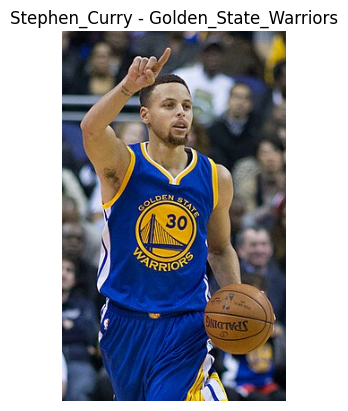

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:

        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

# Example: Change this to your test image
predict_image('/content/drive/My Drive/nba-players/Golden_State_Warriors/Stephen_Curry/8.jpg')

🏀 Predicted Player: LeBron_James
🟣 Predicted Team: Los_Angeles_Lakers


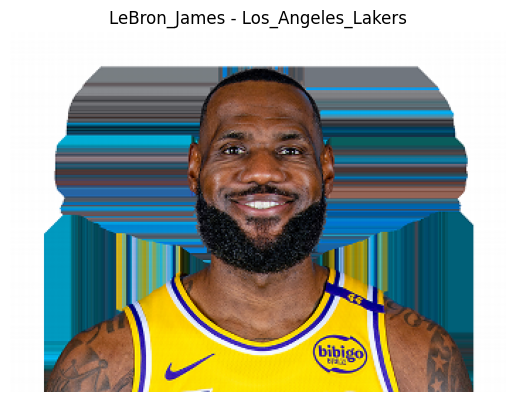

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/My Drive/nba-players/Los_Angeles_Lakers/LeBron_James/Lebron-james.png')

🏀 Predicted Player: Giannis_Antetokounmpo
🟣 Predicted Team: Milwaukee_Bucks


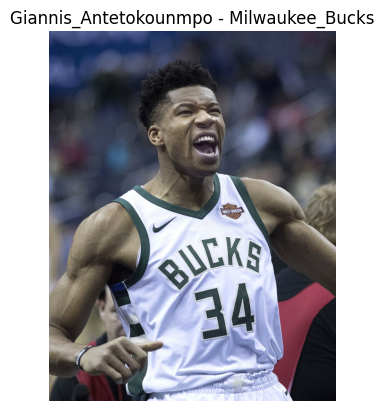

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/My Drive/nba-players/Milwaukee_Bucks/Giannis_Antetokounmpo/Giannis_Antetokounmpo_(24845003687)_(cropped).jpg')

🏀 Predicted Player: Devin_Booker
🟣 Predicted Team: Phoenix_Suns


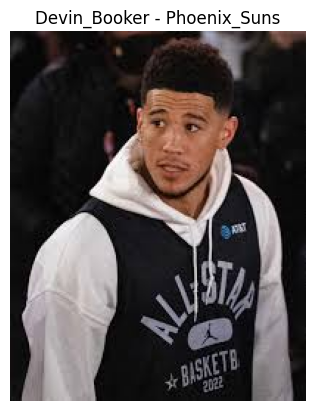

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/My Drive/nba-players/Phoenix_Suns/Devin_Booker/images (3).jpg')

🏀 Predicted Player: Damian_Lilard
🟣 Predicted Team: Portland_Trail_Blazers


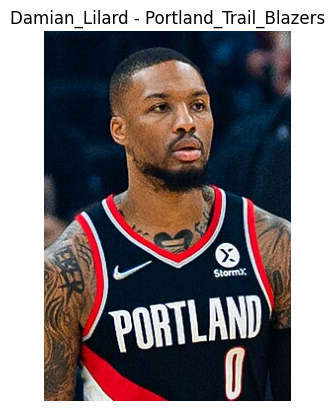

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Portland_Trail_Blazers/Damian_Lilard/Damian_Lillard_(2021)_(cropped).jpg')

🏀 Predicted Player: Trae_Young
🟣 Predicted Team: Atlanta_Hawks


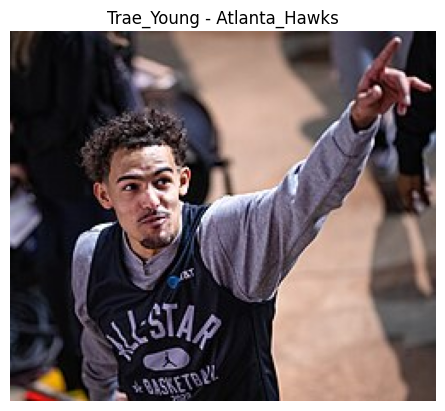

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Atlanta_Hawks/Trae_Young/1.jpg')

🏀 Predicted Player: Jayson_Tatum
🟣 Predicted Team: Boston_Celtics


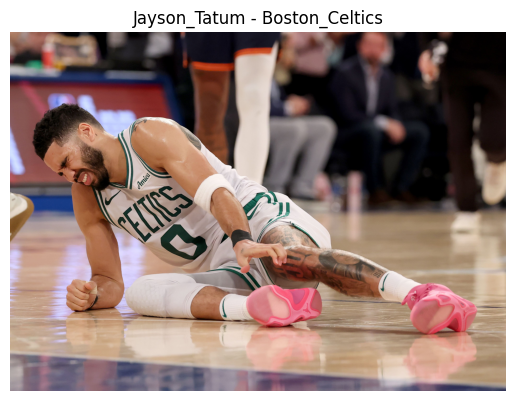

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Boston_Celtics/Jayson_Tatum/2.jpg')

🏀 Predicted Player: Kevin_Durant
🟣 Predicted Team: Brooklyn_Nets


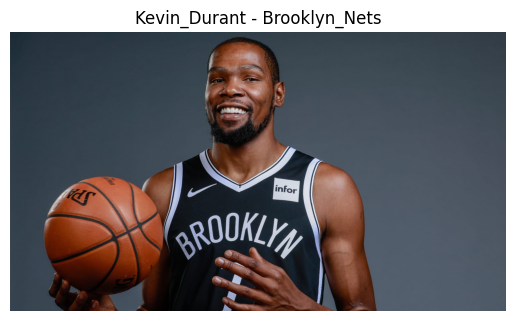

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Brooklyn_Nets/Kevin_Durant/3.jpg')

🏀 Predicted Player: LaMelo_Ball
🟣 Predicted Team: Charlotte_Hornets


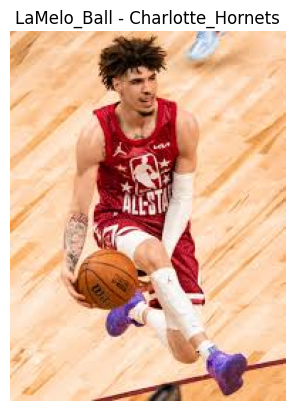

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Charlotte_Hornets/LaMelo_Ball/images (8).jpg')

🏀 Predicted Player: Zach_LaVine
🟣 Predicted Team: Chicago_Bulls


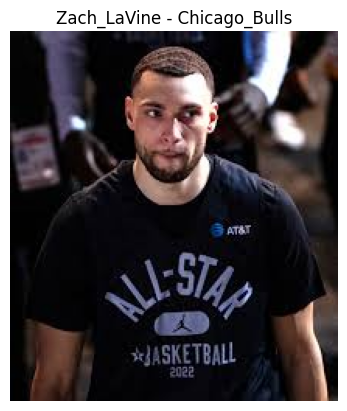

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Chicago_Bulls/Zach_LaVine/images (2).jpg')

🏀 Predicted Player: Donovan_Mitchell
🟣 Predicted Team: Cleveland_Cavaliers


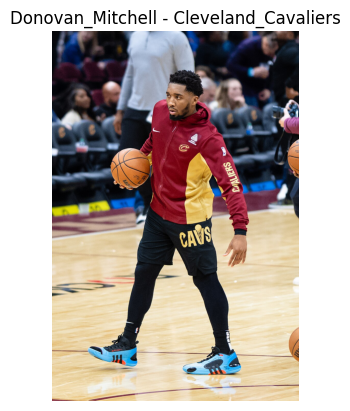

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Cleveland_Cavaliers/Donovan_Mitchell/4.jpg')

🏀 Predicted Player: Luka_Doncic
🟣 Predicted Team: Dallas_Mavericks


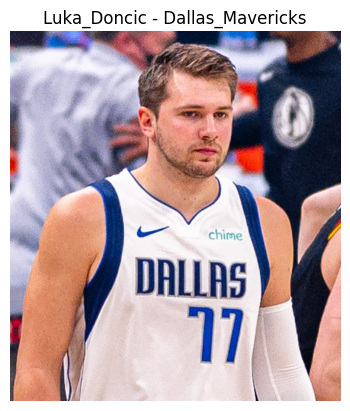

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Dallas_Mavericks/Luka_Doncic/5.jpg')

🏀 Predicted Player: Nikola_Jokic
🟣 Predicted Team: Denver_Nuggets


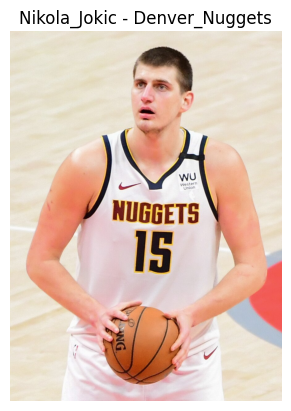

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Denver_Nuggets/Nikola_Jokic/6.jpg')

🏀 Predicted Player: Cade_Cunningham
🟣 Predicted Team: Detroit_Pistons


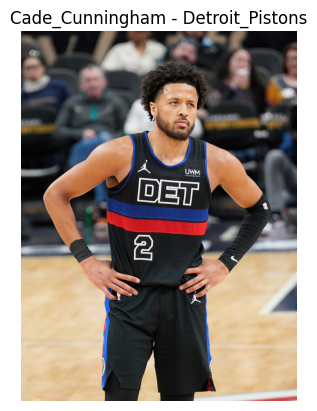

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Detroit_Pistons/Cade_Cunningham/7.jpg')

🏀 Predicted Player: Jalen_Green
🟣 Predicted Team: Houston_Rockets


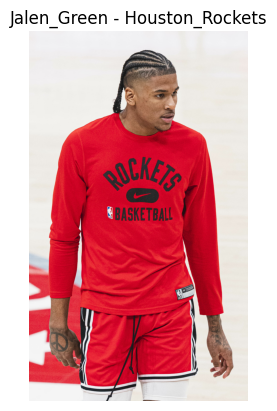

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Houston_Rockets/Jalen_Green/9.jpg')

🏀 Predicted Player: Devin_Booker
🟣 Predicted Team: Phoenix_Suns


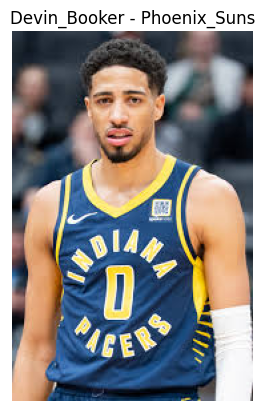

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Indiana_Pacers/Tyrese_Haliburton/images (4).jpg')

🏀 Predicted Player: Devin_Booker
🟣 Predicted Team: Phoenix_Suns


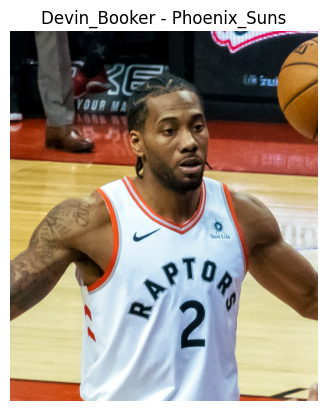

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Los_Angeles_Clippers/Kawhi_Leonard/1_kawhi_leonard_2019_(cropped).jpg')

🏀 Predicted Player: Ja_Morant
🟣 Predicted Team: Memphis_Grizzlies


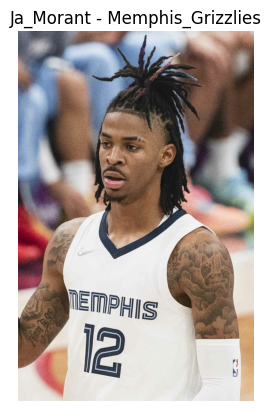

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Memphis_Grizzlies/Ja_Morant/Ja_Morant_2021.jpg')

🏀 Predicted Player: Devin_Booker
🟣 Predicted Team: Phoenix_Suns


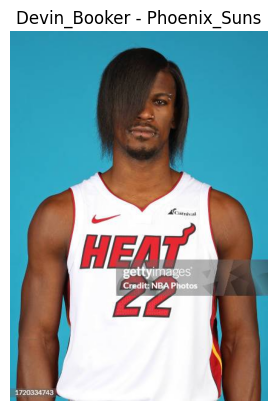

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Miami_Heat/Jimmy_Butler/gettyimages-1720334743-612x612.jpg')

🏀 Predicted Player: Devin_Booker
🟣 Predicted Team: Phoenix_Suns


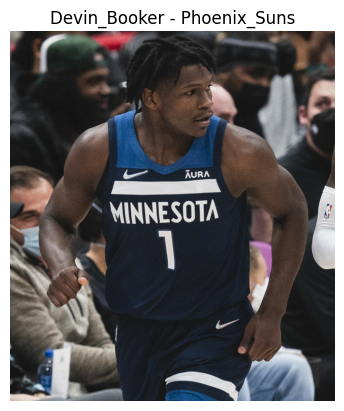

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Minnesota_Timberwolves/Anthony_Edwards/Anthony_Edwards_Kentavious_Caldwell-Pope_(51734745028)_(cropped)_(cropped).jpg')

🏀 Predicted Player: Zion_Williamson
🟣 Predicted Team: New_Orleans_Pelicans


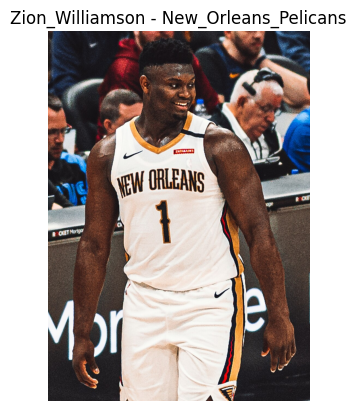

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/New_Orleans_Pelicans/Zion_Williamson/Zion_Williamson_2020_(cropped).jpg')

🏀 Predicted Player: Julius_Randle
🟣 Predicted Team: New_York_Knicks


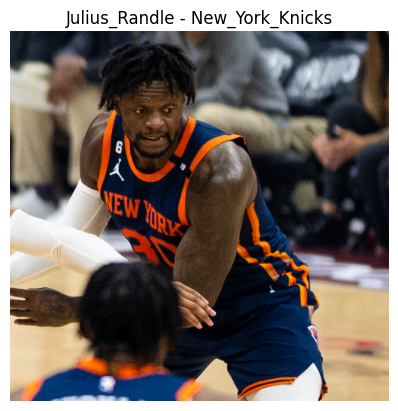

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/New_York_Knicks/Julius_Randle/Julius_Randle_-_52977333593_(cropped) (1).jpg')

🏀 Predicted Player: Shai_Gilgeous-Alexander
🟣 Predicted Team: Oklahoma_City_Thunder


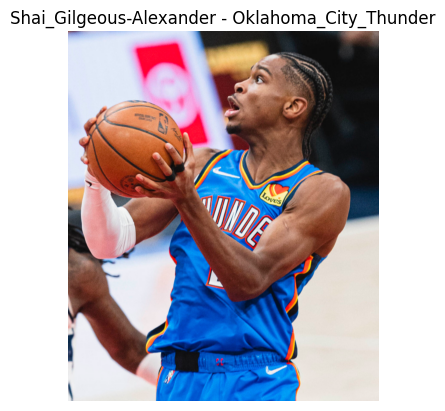

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Oklahoma_City_Thunder/Shai_Gilgeous-Alexander/Shai_Gilgeous-Alexander_-_Thunder_vs._Wizards.png')

🏀 Predicted Player: Paolo_Banchero
🟣 Predicted Team: Orlando_Magic


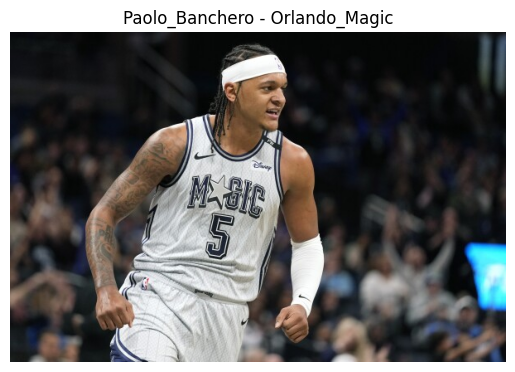

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Orlando_Magic/Paolo_Banchero/download (1).jpg')

🏀 Predicted Player: Stephen_Curry
🟣 Predicted Team: Golden_State_Warriors


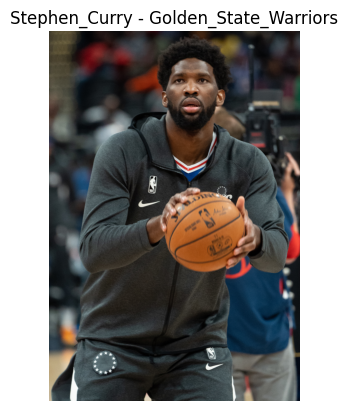

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Philadelphia_76ers/Joel_Embiid/Joel_Embiid_2019.jpg')

🏀 Predicted Player: Damian_Lilard
🟣 Predicted Team: Portland_Trail_Blazers


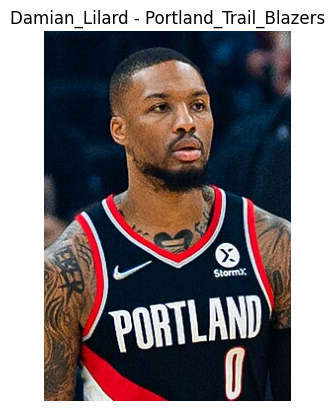

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Portland_Trail_Blazers/Damian_Lilard/Damian_Lillard_(2021)_(cropped).jpg')

🏀 Predicted Player: Devin_Booker
🟣 Predicted Team: Phoenix_Suns


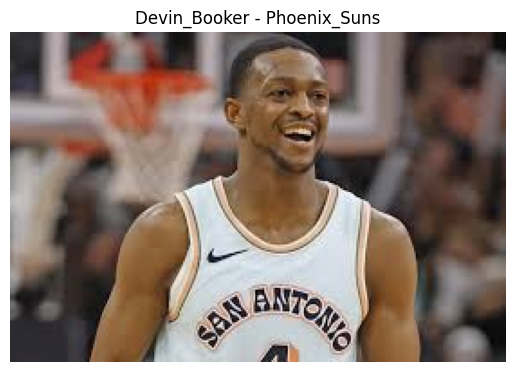

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Sacramento_Kings/DeAaron_Fox/images (5).jpg')

🏀 Predicted Player: Victor_Wembanyama
🟣 Predicted Team: San_Antonio_Spurs


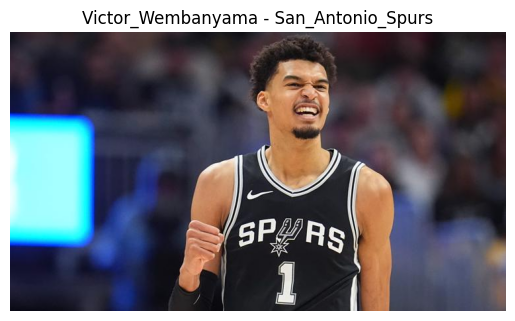

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/San_Antonio_Spurs/Victor_Wembanyama/ee14a600-5b16-4713-9e8a-cdbe976c3edb_750x422.jpg')

🏀 Predicted Player: Pascal_Siakam
🟣 Predicted Team: Toronto_Raptors


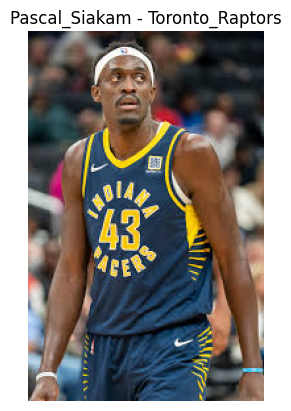

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Toronto_Raptors/Pascal_Siakam/images (6).jpg')

🏀 Predicted Player: Jordan_Clarkson
🟣 Predicted Team: Utah_Jazz


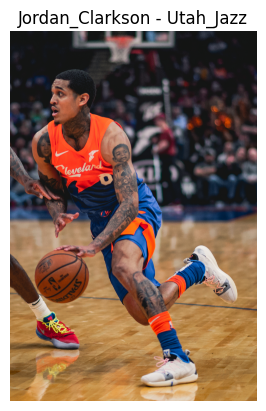

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Utah_Jazz/Jordan_Clarkson/Cleveland_Cavaliers_vs._Brooklyn_Nets_(47112577701).jpg')

🏀 Predicted Player: Devin_Booker
🟣 Predicted Team: Phoenix_Suns


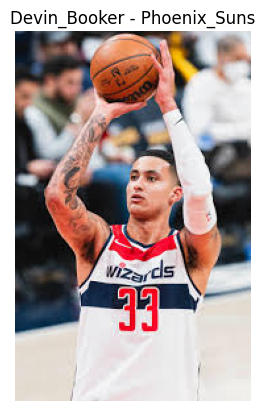

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("⚠️ Could not read image:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)

    player_pred = svm_model.predict(img)[0]  # Player prediction
    team_pred = team_model.predict(img)[0]   # Team prediction

    print(f"🏀 Predicted Player: {player_pred}")
    print(f"🟣 Predicted Team: {team_pred}")

    plt.imshow(cv2.imread(img_path)[..., ::-1])
    plt.axis('off')
    plt.title(f"{player_pred} - {team_pred}")
    plt.show()

predict_image('/content/drive/MyDrive/nba-players/Washington_Wizards/Kyle_Kuzma/images (7).jpg')

In [ ]:
submission_df = pd.DataFrame(predictions)


output_csv = '/content/drive/My Drive/nba players/nba_predictions_submission.csv'
submission_df.to_csv(output_csv, index=False)

print(f"✅ Submission file saved at: {output_csv}")
print(submission_df.head())

NameError: name 'predictions' is not defined